# Programming Task

### Requirement FR6 - Read CSV data from two files and merge it into a single Data Frame 

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from scipy import stats

In [63]:
# Read data from the first file
data1 = pd.read_csv('task2a.csv')

# Read data from the second file
data2 = pd.read_csv('task2b.csv')

# Merge the two data frames
merged_data = pd.merge(data1, data2, on=["Entity","Year"])

# Print the merged data frame
merged_data

,Entity,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Depression (%),Drug use disorders (%),Alcohol use disorders (%)
0,Afghanistan,1990,0.160560,0.697779,0.101855,4.828830,4.071831,1.677082,0.672404
1,Afghanistan,1991,0.160312,0.697961,0.099313,4.829740,4.079531,1.684746,0.671768
2,Afghanistan,1992,0.160135,0.698107,0.096692,4.831108,4.088358,1.694334,0.670644
3,Afghanistan,1993,0.160037,0.698257,0.094336,4.830864,4.096190,1.705320,0.669738
4,Afghanistan,1994,0.160022,0.698469,0.092439,4.829423,4.099582,1.716069,0.669260
...,...,...,...,...,...,...,...,...,...
6463,Zimbabwe,2013,0.155670,0.607993,0.117248,3.090168,3.128192,0.766280,1.515641
6464,Zimbabwe,2014,0.155993,0.608610,0.118073,3.093964,3.140290,0.768914,1.515470
6465,Zimbabwe,2015,0.156465,0.609363,0.119470,3.098687,3.155710,0.771802,1.514751
6466,Zimbabwe,2016,0.157111,0.610234,0.121456,3.104294,3.174134,0.772275,1.513269


### Requirement FR7 - Explore the dataset to identify an "interesting" pattern or trend

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Entity                     6468 non-null   object 
 1   Year                       6468 non-null   int64  
 2   Schizophrenia (%)          6468 non-null   float64
 3   Bipolar disorder (%)       6468 non-null   float64
 4   Eating disorders (%)       6468 non-null   float64
 5   Anxiety disorders (%)      6468 non-null   float64
 6   Depression (%)             6468 non-null   float64
 7   Drug use disorders (%)     6468 non-null   float64
 8   Alcohol use disorders (%)  6468 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 454.9+ KB
None


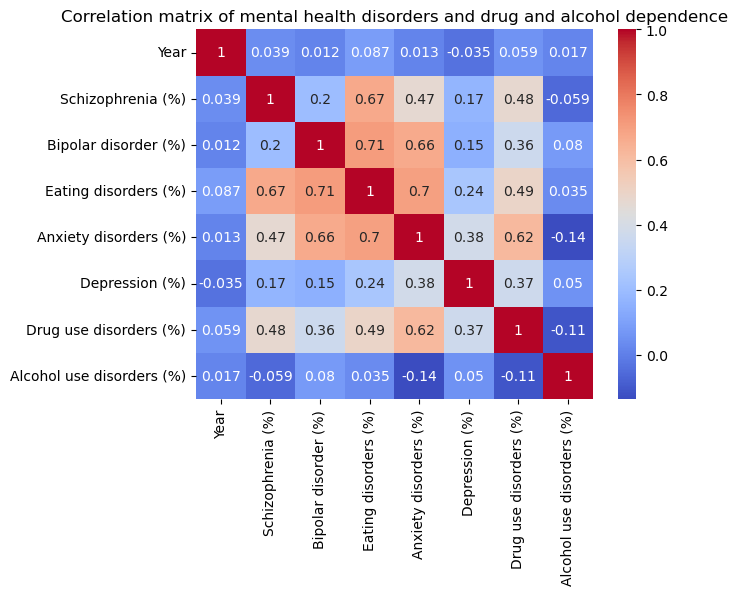

In [40]:
print(merged_data.info())


# Drop the Entity column because correlation can't deal with string
merged_data1 = merged_data.drop('Entity', axis=1)

                                 
# Calculate the correlation matrix
corr = merged_data1.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

#Add the title to my heatmap 

plt.title('Correlation matrix of mental health disorders and drug and alcohol dependence')
plt.show()

The correlation between the disorders is okay. However, there may be some reasons for this. When you take drugs, it will increase your Eating and Bipolar disorder. Therefore, the correlation between these two disorders is positive. On the other hand, when people take drugs, they take less alcohol because drugs are more powerful than alcohol. Therefore, the correlation between Alcohol and Drug use disorder is negative.For me i think Bipolar disorder and Eating disorder , Eating disorder and Anxiety pattern is interesting.

First i want to see what is the trend of my interesting pattern over the year.

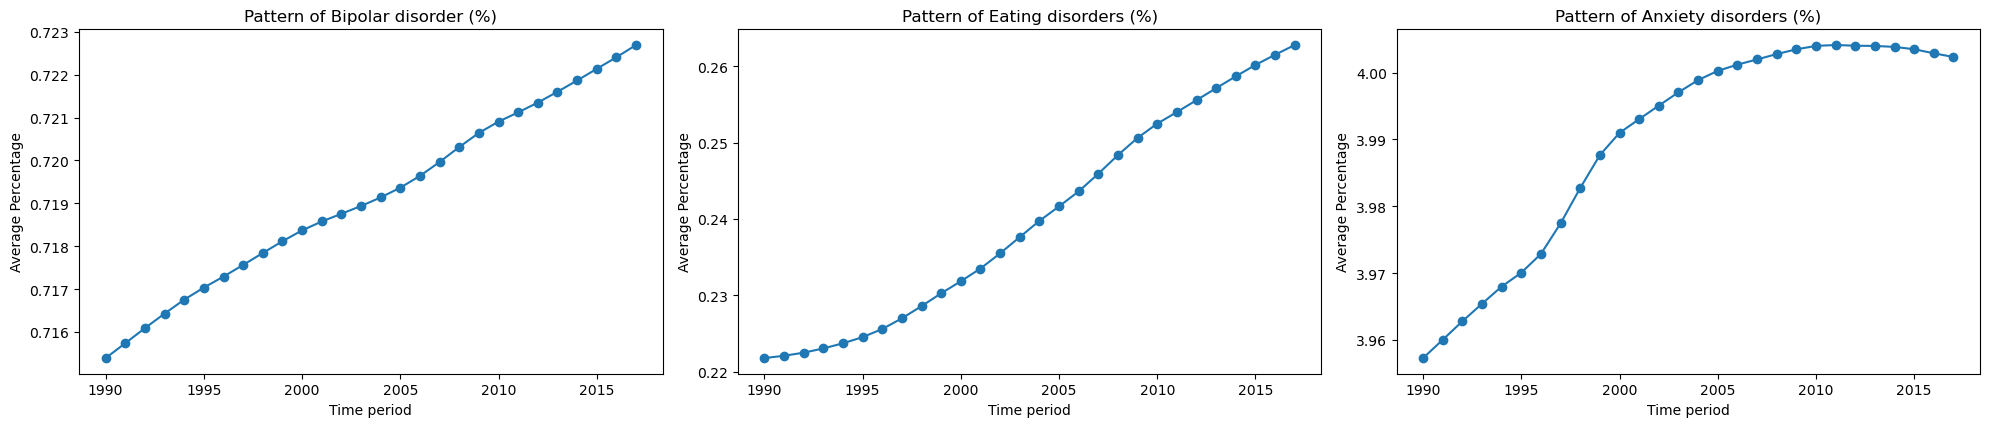

In [41]:
means = merged_data1.groupby('Year').mean()

plt.figure(figsize=(20, 12))
columns = ['Bipolar disorder (%)', 'Eating disorders (%)','Anxiety disorders (%)']

for i, compare in enumerate(columns, 1):
    plt. subplot(3, 3, i)
    means[compare].plot(kind='line' , marker='o') 
    plt.title(f'Pattern of {compare}')
    plt. ylabel('Average Percentage') 
    plt. xlabel('Time period')
plt. tight_layout()
plt.show()

This graphs illustrate the global trends of three mental health disorders: Bipolar Disorder, Eating Disorders, and Anxiety Disorders, over a span of years. A few key observations can be made:

General Observation: All three disorders exhibit an overall increasing trend over the years, indicating a rise in the average percentage of the global population affected by these disorders.

Eating Disorders: An interesting pattern is observed between 1995 and 2000, where the prevalence of eating disorders shows a slight dip before resuming its upward trajectory. This suggests a temporary decrease in the global impact of eating disorders during this period.

Anxiety Disorders: Between 2000 and 2010, the trend line for anxiety disorders deviates from a straight line and forms a slight oval shape, indicating a period of fluctuation in the global prevalence of anxiety disorders. This could suggest varying factors influencing the incidence of anxiety disorders during this decade.

These patterns provide valuable insights into the global trends of these mental health disorders and indicate potential areas for further exploration and analysis. It’s important to note that while these trends provide a general overview, a more detailed investigation would be necessary to understand the specific factors contributing to these patterns.

In [42]:
# Create a subset of the merged_data DataFrame with the columns of interest
test = merged_data[['Entity','Bipolar disorder (%)','Eating disorders (%)', 'Anxiety disorders (%)']]

# Group the data by the Entity column and calculate the correlation matrix for each group because Entity is string so that corr isn't working
grouped = test.groupby('Entity').corr()

# Initialize an empty list to store the correlation values
correlations = []

# Loop through each group and select the correlation values for each pair of columns
for country in test['Entity'].unique():
    # Select the correlation values for the current country
    correlation_value1 = grouped.loc[(country, 'Bipolar disorder (%)'), 'Eating disorders (%)']
    correlation_value2 = grouped.loc[(country, 'Eating disorders (%)'), 'Anxiety disorders (%)']
    # Append the country name and the correlation values to the correlations list as a list
    correlations.append([country, correlation_value1, correlation_value2])


# Print the correlations list as a DataFrame
df = pd.DataFrame(correlations, columns=['Country', 'Eating and Bipolar disorder correlation', 'Eating and Anxiety disorder correlation'])
print(df)

                        Country  Eating and Bipolar disorder correlation  \
0                   Afghanistan                                 0.580787   
1                       Albania                                 0.963104   
2                       Algeria                                 0.970987   
3                American Samoa                                -0.820573   
4          Andean Latin America                                 0.983827   
..                          ...                                      ...   
226  Western Sub-Saharan Africa                                 0.984475   
227                       World                                 0.985236   
228                       Yemen                                 0.950971   
229                      Zambia                                 0.967238   
230                    Zimbabwe                                -0.238136   

     Eating and Anxiety disorder correlation  
0                                   0.66

The results show that there is a wide variation in the correlation coefficients between Eating and Bipolar disorder, and Eating and Anxiety disorder, across countries.This result suggests that the relationship between the disorders is not uniform across countries, and may be influenced by other factors.Some interesting patterns emerge when comparing the results across countries or regions. For example, most of the countries in Africa have high positive correlation coefficients between both pairs of disorders, indicating a strong positive linear relationship. On the other hand, most of the countries in Oceania have low or negative correlation coefficients between both pairs of disorders, indicating a weak or negative linear relationship. This may reflect the differences in the prevalence, diagnosis, and treatment of the disorders in these regions.One notable outlier in the results is American Samoa, which has the lowest correlation coefficients between both pairs of disorders, -0.82 and -0.84, respectively. This means that there is a strong negative linear relationship between the disorders in this country, which is opposite to the general trend. This may be due to some unique characteristics of this country, such as its small population, isolated location, or cultural factors.

In [43]:
# Find the maximum and minimum value for the Eating and Bipolar disorder correlation
max_eb = max(correlations, key=lambda x: x[1])
min_eb = min(correlations, key=lambda x: x[1])
# Find the maximum and minimum value for the Eating and Anxiety disorder correlation
max_ea = max(correlations, key=lambda x: x[2])
min_ea = min(correlations, key=lambda x: x[2])

# Print the results
print(f'The maximum value for the Eating and Bipolar disorder correlation is {max_eb[1]} and it occurs in {max_eb[0]}.')
print(f'The minimum value for the Eating and Bipolar disorder correlation is {min_eb[1]} and it occurs in {min_eb[0]}.')
print(f'The maximum value for the Eating and Anxiety disorder correlation is {max_ea[2]} and it occurs in {max_ea[0]}.')
print(f'The minimum value for the Eating and Anxiety disorder correlation is {min_ea[2]} and it occurs in {min_ea[0]}.')


The maximum value for the Eating and Bipolar disorder correlation is 0.999588947122549 and it occurs in Cape Verde.
The minimum value for the Eating and Bipolar disorder correlation is -0.9615424441282733 and it occurs in High SDI.
The maximum value for the Eating and Anxiety disorder correlation is 0.9958785305626542 and it occurs in Tunisia.
The minimum value for the Eating and Anxiety disorder correlation is -0.9444504068835436 and it occurs in Malta.


Some interesting patterns emerge when comparing the results across countries. For example, Cape Verde has the highest positive correlation coefficient between Eating and Bipolar disorder, 0.99, which means that as the prevalence of one disorder increases, so does the other. On the other hand, High SDI has the lowest negative correlation coefficient between Eating and Bipolar disorder, -0.96, which means that as the prevalence of one disorder increases, the other decreases. This may reflect the differences in the risk factors, diagnosis, and treatment of the disorders in these countries.\nSimilarly, Tunisia has the highest positive correlation coefficient between Eating and Anxiety disorder, 0.99, which means that as the prevalence of one disorder increases, so does the other. On the other hand, Malta has the lowest negative correlation coefficient between Eating and Anxiety disorder, -0.94, which means that as the prevalence of one disorder increases, the other decreases. This may reflect the differences in the cultural, environmental, or genetic factors that influence the disorders in these countries.

<Figure size 1000x800 with 0 Axes>

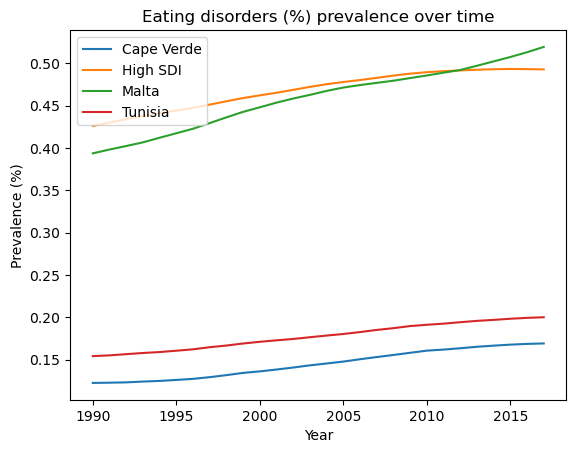

<Figure size 1000x800 with 0 Axes>

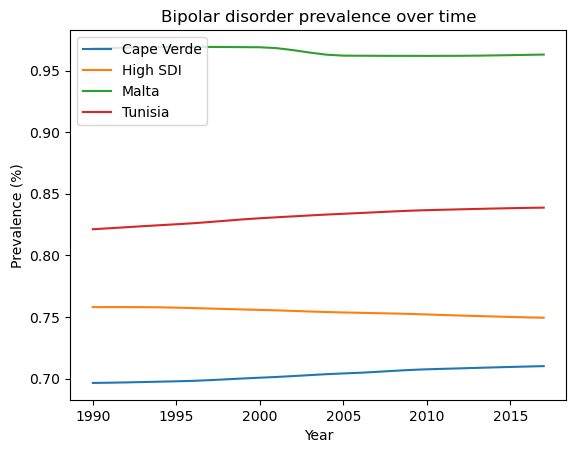

<Figure size 1000x800 with 0 Axes>

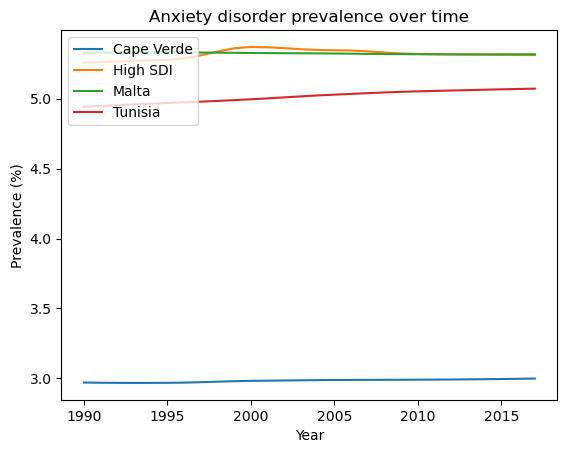

In [44]:
# Create a subset of the merged_data DataFrame with the columns of interest
test = merged_data[['Entity','Year','Eating disorders (%)','Bipolar disorder (%)','Anxiety disorders (%)']]

# Filter the test DataFrame by using the query() method
test = test.query('Entity=="Cape Verde" or Entity=="High SDI" or Entity=="Tunisia" or Entity=="Malta"')

# Reshape the data into a pivot table with Year as the index, Entity as the columns, and disorder columns as the values
pivot = test.pivot_table(index='Year', columns='Entity', values=['Eating disorders (%)','Bipolar disorder (%)','Anxiety disorders (%)'])

# Create a line chart for each disorder
plt.figure(figsize=(10,8)) # The figure size
pivot['Eating disorders (%)'].plot() # Plot the schizophrenia data
plt.legend(loc='upper left') # Add a legend to the upper left corner
plt.xlabel('Year') # Add a label to the x-axis
plt.ylabel('Prevalence (%)') # Add a label to the y-axis
plt.title('Eating disorders (%) prevalence over time') # Add a title to the chart
plt.show() # Show the chart

plt.figure(figsize=(10,8)) # The figure size
pivot['Bipolar disorder (%)'].plot() # Plot the bipolar disorder data
plt.legend(loc='upper left') # Add a legend to the upper left corner
plt.xlabel('Year') # Add a label to the x-axis
plt.ylabel('Prevalence (%)') # Add a label to the y-axis
plt.title('Bipolar disorder prevalence over time') # Add a title to the chart
plt.show() # Show the chart

plt.figure(figsize=(10,8)) # The figure size
pivot['Anxiety disorders (%)'].plot() # Plot the anxiety disorder data
plt.legend(loc='upper left') # Add a legend to the upper left corner
plt.xlabel('Year') # Add a label to the x-axis
plt.ylabel('Prevalence (%)') # Add a label to the y-axis
plt.title('Anxiety disorder prevalence over time') # Add a title to the chart
plt.show() # Show the chart


From this graphs illustrates the prevalence of Eating disorder, Anxiety disorders,and Bipolar disorder over time from 1990 to 2015 in four different entities: Cape Verde, High SDI, Malta, and Tunisia.I choose only this entities because of they have maximum and minimum values what we find it previously. Here’s a detailed interpretation:

Eating Disorder:The prevalence of Eating disorders in Cape Verde and Tunisia are the lowest among the four entities. It remains steady around 0.15% over the entire period from 1990 to 2015.Malta and High SDI, which likely refers to regions with a high Socio-Demographic Index, shows a higher prevalence of eating disorders.But Malta over the time period it increses from 0.40 to slightly above 0.50 and in the mean time in 2010 to 2015 in this time period High SDI value decreses slightly and remain around 0.45.

Bipolar Disorder: The prevalence of bipolar disorder in Cape Verde is the lowest among the four entities. It remains relatively stable around 0.70% over the entire period.Malta, which likely refers to regions with a high Socio-Demographic Index, shows the highest prevalence of bipolar disorder. The prevalence remains relatively constant around 0.96% over the years.Tunisia shows a relatively constant prevalence of bipolar disorder just below 0.85% over the years.High SDI shows a moderate prevalence of bipolar disorder, with rates higher than Cape Verde but lower than Malta and Tunisia. The prevalence appears to be around 0.76%.

Anxiety Disorder : The prevalence of anxiety disorders in Cape Verde is the lowest among the four entities. It remains steady around 3% over the entire period from 1990 to 2015.High SDI, which likely refers to regions with a high Socio-Demographic Index, shows a higher prevalence of anxiety disorders. But in Malta shows a relatively constant prevalence of anxiety disorders just below 5% over the years, indicating it has almost similar but slightly lower anxiety disorder prevalence as compared to High SDI.Tunisia shows a moderate prevalence of anxiety disorders, with rates higher than Cape Verde but lower than Malta and High SDI.


### Requirement FR8 - Detect and remove any outliers in the data used for your "interesting" pattern or trend

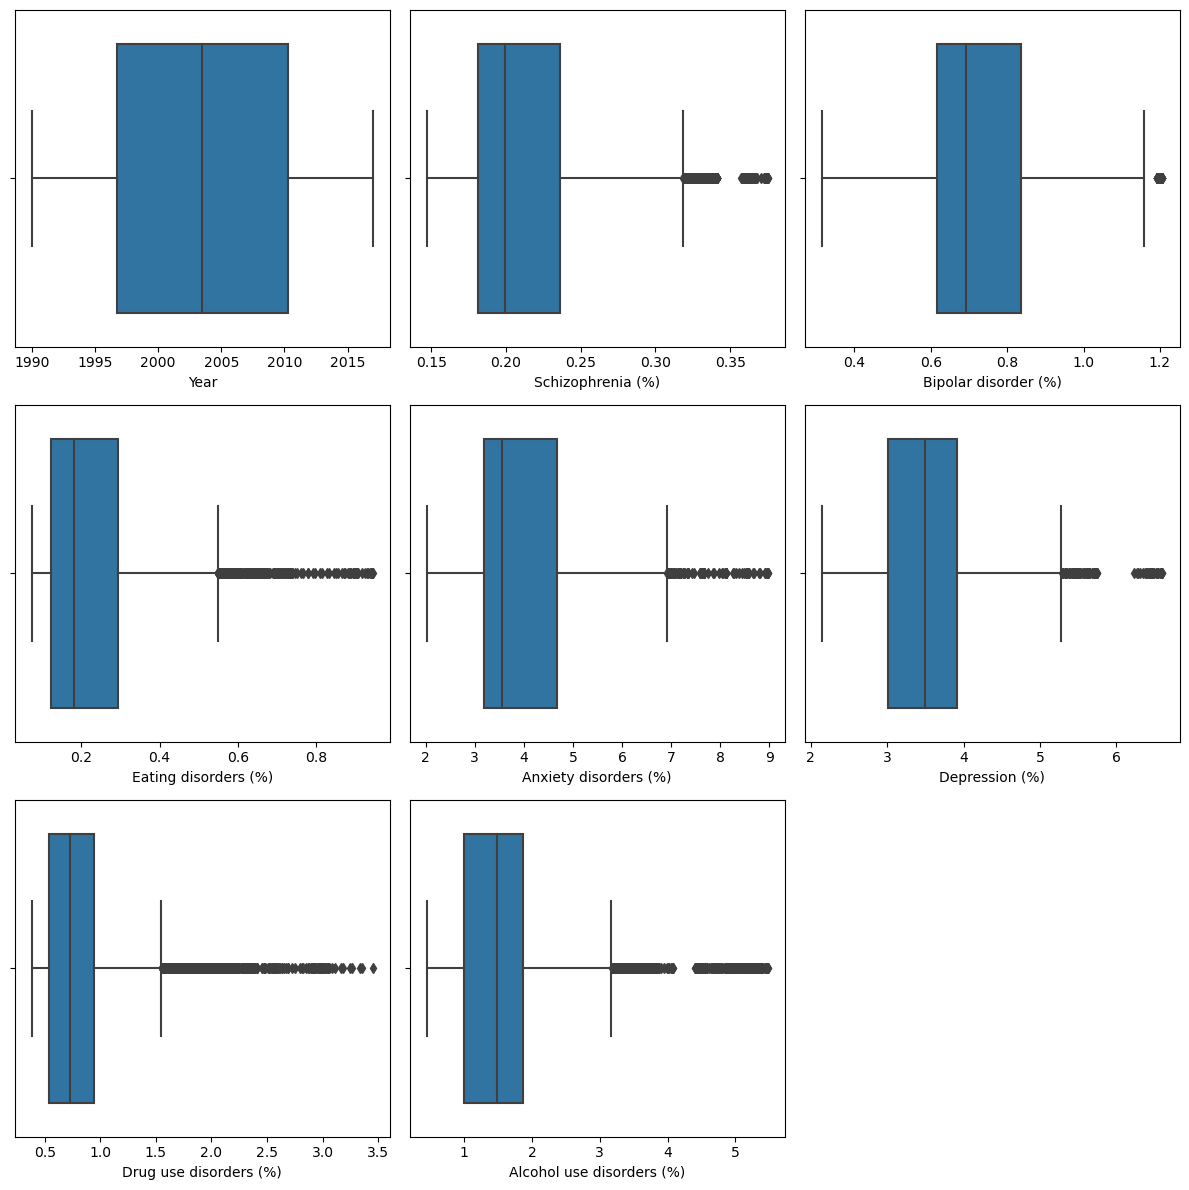

,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Depression (%),Drug use disorders (%),Alcohol use disorders (%)
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,2003.500000,0.211644,0.719145,0.239998,3.989921,3.497654,0.862278,1.585821
std,8.078372,0.044253,0.171589,0.158141,1.167526,0.655859,0.460679,0.860283
min,1990.000000,0.146902,0.314535,0.073908,2.023393,2.139903,0.383650,0.446940
25%,1996.750000,0.181530,0.615532,0.122387,3.188824,3.005529,0.535064,0.993685
50%,2003.500000,0.199563,0.693134,0.182525,3.554373,3.499606,0.726430,1.479937
75%,2010.250000,0.236365,0.835063,0.292666,4.682163,3.912381,0.940157,1.867834
max,2017.000000,0.375110,1.206597,0.943991,8.967330,6.602754,3.452476,5.474668


In [45]:
def plot_boxplots(df):

    # select only numeric columns
    df_numeric = df.select_dtypes(include=[np.number])
    
    # calculate the number of plots, rows, and columns
    num_plots = len(df_numeric.columns)
    num_cols = math.ceil(math.sqrt(num_plots))
    num_rows = math.ceil(num_plots/num_cols)

    # create a figure and a grid of subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols*4,num_rows*4))

    # loop over the numeric columns and plot each of them
    for i, col in enumerate(df_numeric.columns):
        # get the current axes
        ax = axs.flat[i]
        # plot a boxplot for the current column
        sns.boxplot(x=df_numeric[col], ax=ax)
        
    # remove the empty subplot(s) if any
    for ax in axs.flat[num_plots:]:
        ax.remove()

    # adjust the spacing between subplots
    plt.tight_layout()
    # show the plots
    plt.show()

# call the function with the merged_data1 DataFrame
plot_boxplots(merged_data1)
# print the summary statistics of the merged_data1 DataFrame
merged_data1.describe()


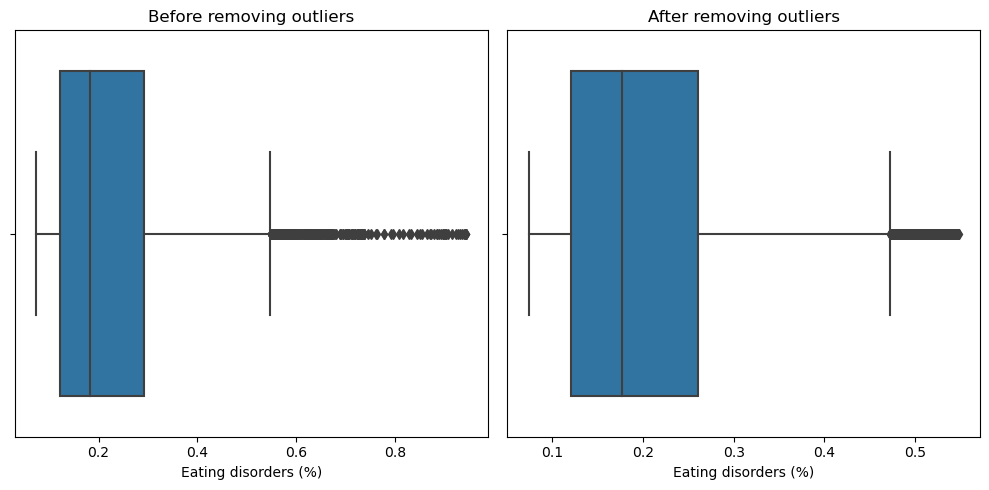

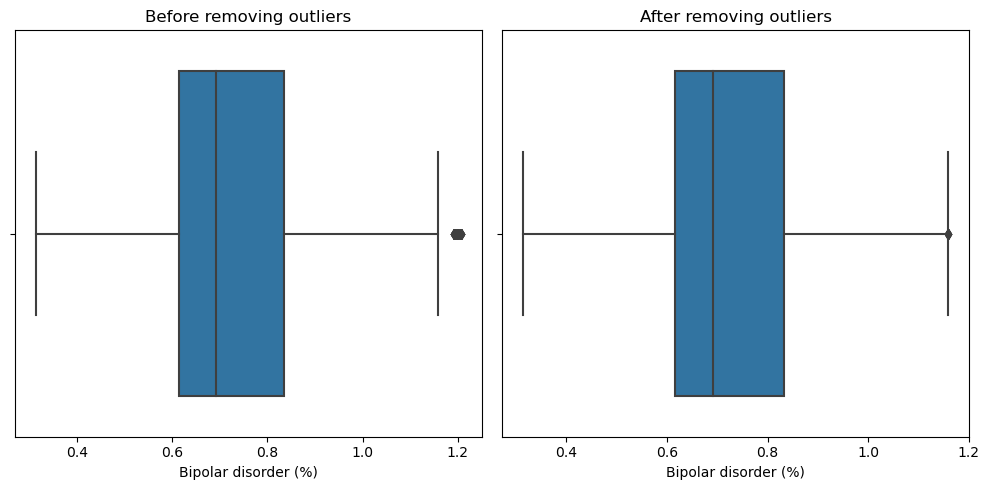

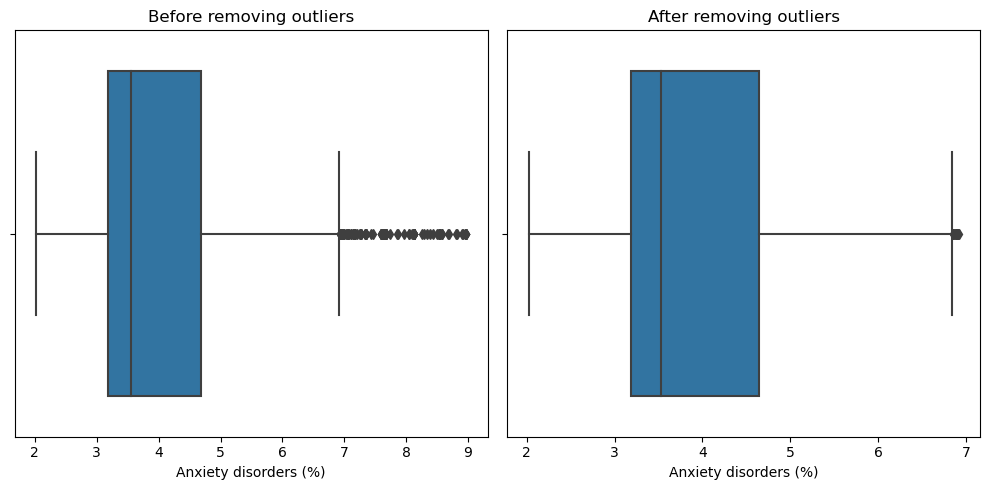

In [46]:
def remove_outliers(df, column):
    """
    This function removes outliers from a DataFrame column using the IQR method.
    Parameters:
    df (DataFrame): The DataFrame to remove outliers from.
    column (str): The column name to remove outliers from.
    Returns:
    df_no_outliers (DataFrame): The DataFrame with outliers removed.
    """
    Q1 = df[column].quantile(0.25)  # Calculate the first quartile
    Q3 = df[column].quantile(0.75)  # Calculate the third quartile
    IQR = Q3 - Q1  # Calculate the Interquartile Range
    lower_bound = Q1 - 1.5 * IQR  # Define the lower bound for non-outliers
    upper_bound = Q3 + 1.5 * IQR  # Define the upper bound for non-outliers
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]  # Remove outliers
    return df_no_outliers

# Remove outliers from the 'Eating disorders (%)' column
merged_data2_no_outliers = remove_outliers(merged_data1, 'Eating disorders (%)')

# Plot boxplots before and after removing outliers
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Boxplot before removing outliers
sns.boxplot(x=merged_data1['Eating disorders (%)'], ax=axs[0])
axs[0].set_title('Before removing outliers')

# Boxplot after removing outliers
sns.boxplot(x=merged_data2_no_outliers['Eating disorders (%)'], ax=axs[1])
axs[1].set_title('After removing outliers')

plt.tight_layout()
plt.show()

# Remove outliers from the 'Bipolar disorder (%)' column
merged_data1_no_outliers = remove_outliers(merged_data1, 'Bipolar disorder (%)')

# Plot boxplots before and after removing outliers
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Boxplot before removing outliers
sns.boxplot(x=merged_data1['Bipolar disorder (%)'], ax=axs[0])
axs[0].set_title('Before removing outliers')

# Boxplot after removing outliers
sns.boxplot(x=merged_data1_no_outliers['Bipolar disorder (%)'], ax=axs[1])
axs[1].set_title('After removing outliers')

plt.tight_layout()
plt.show()

# Remove outliers from the 'Anxiety disorders (%)' column
merged_data2_no_outliers = remove_outliers(merged_data1, 'Anxiety disorders (%)')

# Plot boxplots before and after removing outliers
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Boxplot before removing outliers
sns.boxplot(x=merged_data1['Anxiety disorders (%)'], ax=axs[0])
axs[0].set_title('Before removing outliers')

# Boxplot after removing outliers
sns.boxplot(x=merged_data2_no_outliers['Anxiety disorders (%)'], ax=axs[1])
axs[1].set_title('After removing outliers')

plt.tight_layout()
plt.show()


As my interesting pattern was Eating,Bipolar and Anxiety disorder and after seeing that there is some outliers in my interesting columns so i just use most popular inter quartal range method to removing the outliers and then after removing the outliers we plot before and after removing the outliers of Eating,Bipolar and Anxiety disorder boxplot and clearly see that our new data is now more clean and ready to use further than before.

### Requirement FR9 - Define a hypothesis to test your “interesting” pattern or trend

Hypothesis testing is a statistical method used to make inferences or draw conclusions about a population based on a sample of data. It involves making an initial claim, collecting data, and then determining whether the data supports or contradicts the claim.

In my case,thought my interesting pattern was Eating,Bipolar and Anxiety disorder but for hypothesis test I'm interested in the relationship between ‘Drug use disorders (%)’ with my interesting disorders. Specifically, I'm looking to see if there’s a significant correlation between these two variables with other disorders.

To test this, I can set up the following hypotheses:

Null Hypothesis (H0): There is no correlation between ‘Drug use disorders (%)’  with respectively all other disorder. This means that the Pearson correlation coefficient is equal to 0.

Alternative Hypothesis (H1): There is a correlation between ‘Drug use disorders (%)’ with respectively all other disorde. This means that the Pearson correlation coefficient is not equal to 0.

Then compute the Pearson correlation coefficient and the associated p-value. The Pearson correlation coefficient measures the linear relationship between two datasets, with values ranging from -1 (perfect negative correlation) to +1 (perfect positive correlation). A value of 0 indicates no correlation.

The p-value is the probability of obtaining the observed data (or data more extreme) if the null hypothesis is true. If the p-value is less than a chosen significance level (commonly 0.05), then reject the null hypothesis in favor of the alternative hypothesis. In other words, if the p-value is less than 0.05, conclude that there is a significant

In hypothesis testing, the significance level is the probability of rejecting the null hypothesis when it is true. In other words, it’s the maximum probability of willing to accept of incorrectly rejecting the null hypothesis.

For hypothesis test our first task is to see the summary of our desire data and the best way to visualise relations between two continuos numerical data is to use scatterplots.

Summary statistics for 'Drug use disorders (%)':
 count    6468.000000
mean        0.862278
std         0.460679
min         0.383650
25%         0.535064
50%         0.726430
75%         0.940157
max         3.452476
Name: Drug use disorders (%), dtype: float64


/Users/jabedhossain/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


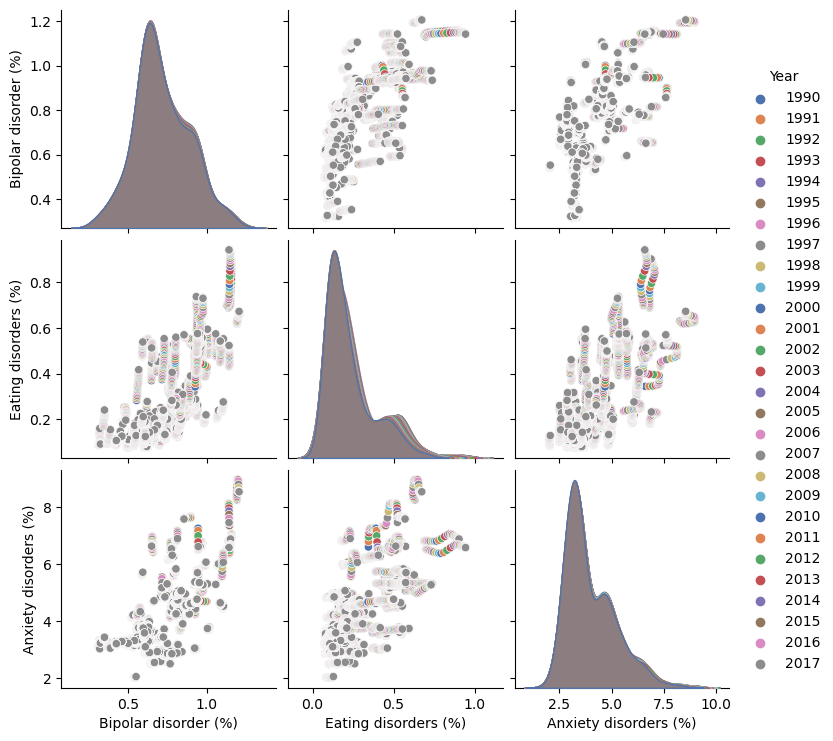

In [58]:
# Summary statistics for 'Drug use disorders (%)'
drug_use_summary = merged_data1['Drug use disorders (%)'].describe()
print("Summary statistics for 'Drug use disorders (%)':\n", drug_use_summary)

sns.pairplot(merged_data1, 
             vars=['Bipolar disorder (%)', 'Eating disorders (%)','Anxiety disorders (%)'], 
             hue='Year', palette='deep');

From here we have a idea about the drug use and alcohol use disorder summary.The plots above seem to show little or no correlation between any disorder each year.

### Requirement FR10 - Test your hypothesis with statistical significance level of 0.05

In [64]:
def compute_pearsonr_stats(df, columns):
    """
    This function computes the Pearson correlation coefficient, p-values, and significance test results for a given DataFrame and columns.
    """
    x = 'Drug use disorders (%)'  # Define the column to correlate with
    df_corr = pd.DataFrame()  # Initialize the correlation matrix
    df_p = pd.DataFrame()  # Initialize the matrix of p-values
    df_significant = pd.DataFrame()  # Initialize the matrix of significance test results
    for y in columns:  # Iterate over the columns
        corr = stats.pearsonr(df[x], df[y])  # Compute the Pearson correlation coefficient and the p-value
        df_corr.loc[x, y] = corr[0]  # Store the correlation coefficient
        df_p.loc[x,y] = corr[1]  # Store the p-value
        df_significant.loc[x, y] = 'Yes' if corr[1] < 0.05 else 'No'  # Test for significance and store the result
    return(df_corr, df_p, df_significant)  # Return the computed DataFrames

# Compute the statistics for the 'Drug use disorders (%)' column
df_corr, df_p, df_significant = compute_pearsonr_stats(merged_data1, ['Bipolar disorder (%)', 'Eating disorders (%)','Anxiety disorders (%)'])

# Display the results
display('Correlation coefficients for Drug use disorder:\n',df_corr)
display('p-values Drug use disorder:\n',df_p)
display('Significant at 0.05 level:\n', df_significant)

'Correlation coefficients for Drug use disorder:\n'

,Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%)
Drug use disorders (%),0.363871,0.494187,0.616077


'p-values Drug use disorder:\n'

,Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%)
Drug use disorders (%),1.045555e-201,0.0,0.0


'Significant at 0.05 level:\n'

,Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%)
Drug use disorders (%),Yes,Yes,Yes


The Pearson correlation coefficient measures the linear relationship between two datasets. The values range from -1 (a perfect negative linear correlation) to +1 (a perfect positive linear correlation). A value of 0 indicates no linear correlation. Therefore, a larger absolute value indicates a stronger correlation.

The p-value is used in hypothesis testing to help support or reject the null hypothesis. It represents the probability that the results of the test occurred at random. If p-value < 0.05 (in my case), we can reject the null hypothesis.

Let’s interpret the results:

Drug use disorders (%):

The correlation coefficients range from 0.363871 to 0.616077. This suggests varying degrees of correlation with other disorders. For instance, ‘Anxiety disorders (%)’ has a strong positive correlation of 0.616077, while ‘Bipolar disorders (%)’ has a less correlation of 0.363871.
The p-values are all less than 0.05, which means all correlations are statistically significant.


In conclusion, there are statistically significant correlations between ‘Drug use disorders (%)’ and other disorders. However, the strength of these correlations varies. ‘Drug use disorders (%)’ has a strong positive correlation with ‘Anxiety disorders (%)’, while ‘Drug use disorders (%)’ has less strong correlations with Bipolar disorders. This suggests that drug use disorders are more likely to co-occur with anxiety disorders,considered in this analysis.

Please note that a non-significant result does not prove that the correlation is zero; it just means that there isn’t enough evidence to conclude that it’s non-zero. Also, a significant result does not tell you anything about the magnitude or importance of the correlation; it just tells you that it’s likely to be non-zero.